# 🖼️ Multi-Image Visual Question Answering (VQA) Demo

#### This project demonstrates a mini Visual Question Answering (VQA) system using state-of-the-art pre-trained models. It shows how to process multiple images, generate general captions for context, and answer custom questions about the images along with confidence scores.

### The notebook is fully implemented in Python (Jupyter) and uses PyTorch and Hugging Face Transformers.

In [1]:
# ====================================
# Multi-Image Captioning and VQA Demo
# ====================================

!pip install transformers torch torchvision pillow --quiet

from transformers import ViltProcessor, ViltForQuestionAnswering, BlipProcessor, BlipForConditionalGeneration
from PIL import Image
from IPython.display import display, Markdown

In [2]:
# ---------------------------
# Notebook Title
# ---------------------------
display(Markdown("# 🖼️ Polished Multi-Image VQA Demo"))
display(Markdown("For each image, the notebook shows both:"))
display(Markdown("- BLIP-generated caption (general description)"))
display(Markdown("- VQA answers with confidence scores"))

# 🖼️ Polished Multi-Image VQA Demo

For each image, the notebook shows both:

- BLIP-generated caption (general description)

- VQA answers with confidence scores

In [3]:
# ---------------------------
# Load Models
# ---------------------------
display(Markdown("## Loading Models ..."))
vqa_processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
vqa_model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
display(Markdown("**Models loaded successfully! ✅**"))

## Loading Models ...

/Users/Akhila/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


**Models loaded successfully! ✅**

In [4]:
# ---------------------------
# Functions
# ---------------------------
def vqa_answer_with_confidence(image, question):
    encoding = vqa_processor(image, question, return_tensors="pt")
    outputs = vqa_model(**encoding)
    logits = outputs.logits
    idx = logits.argmax(-1).item()
    answer = vqa_model.config.id2label[idx]
    confidence = logits.softmax(dim=-1)[0, idx].item()  # softmax probability
    return answer, confidence

def blip_caption(image):
    inputs = blip_processor(image, return_tensors="pt")
    out = blip_model.generate(**inputs)
    caption = blip_processor.decode(out[0], skip_special_tokens=True)
    return caption

In [5]:
# ---------------------------
# Images and Questions
# ---------------------------
image_paths = [
   "/Users/Akhila/Desktop/Py_Images/img01.jpg",
    "/Users/Akhila/Desktop/Py_Images/img02.jpg",
    "/Users/Akhila/Desktop/Py_Images/img03.jpeg",
    "/Users/Akhila/Desktop/Py_Images/img04.jpeg",
    "/Users/Akhila/Desktop/Py_Images/img05.jpeg"
]

questions = [
    "What is in the image?",
    "Describe the main objects.",
    "What is happening?",
    "What is the color of the main object?",
    "How many main objects are there?"
]

## Image 1

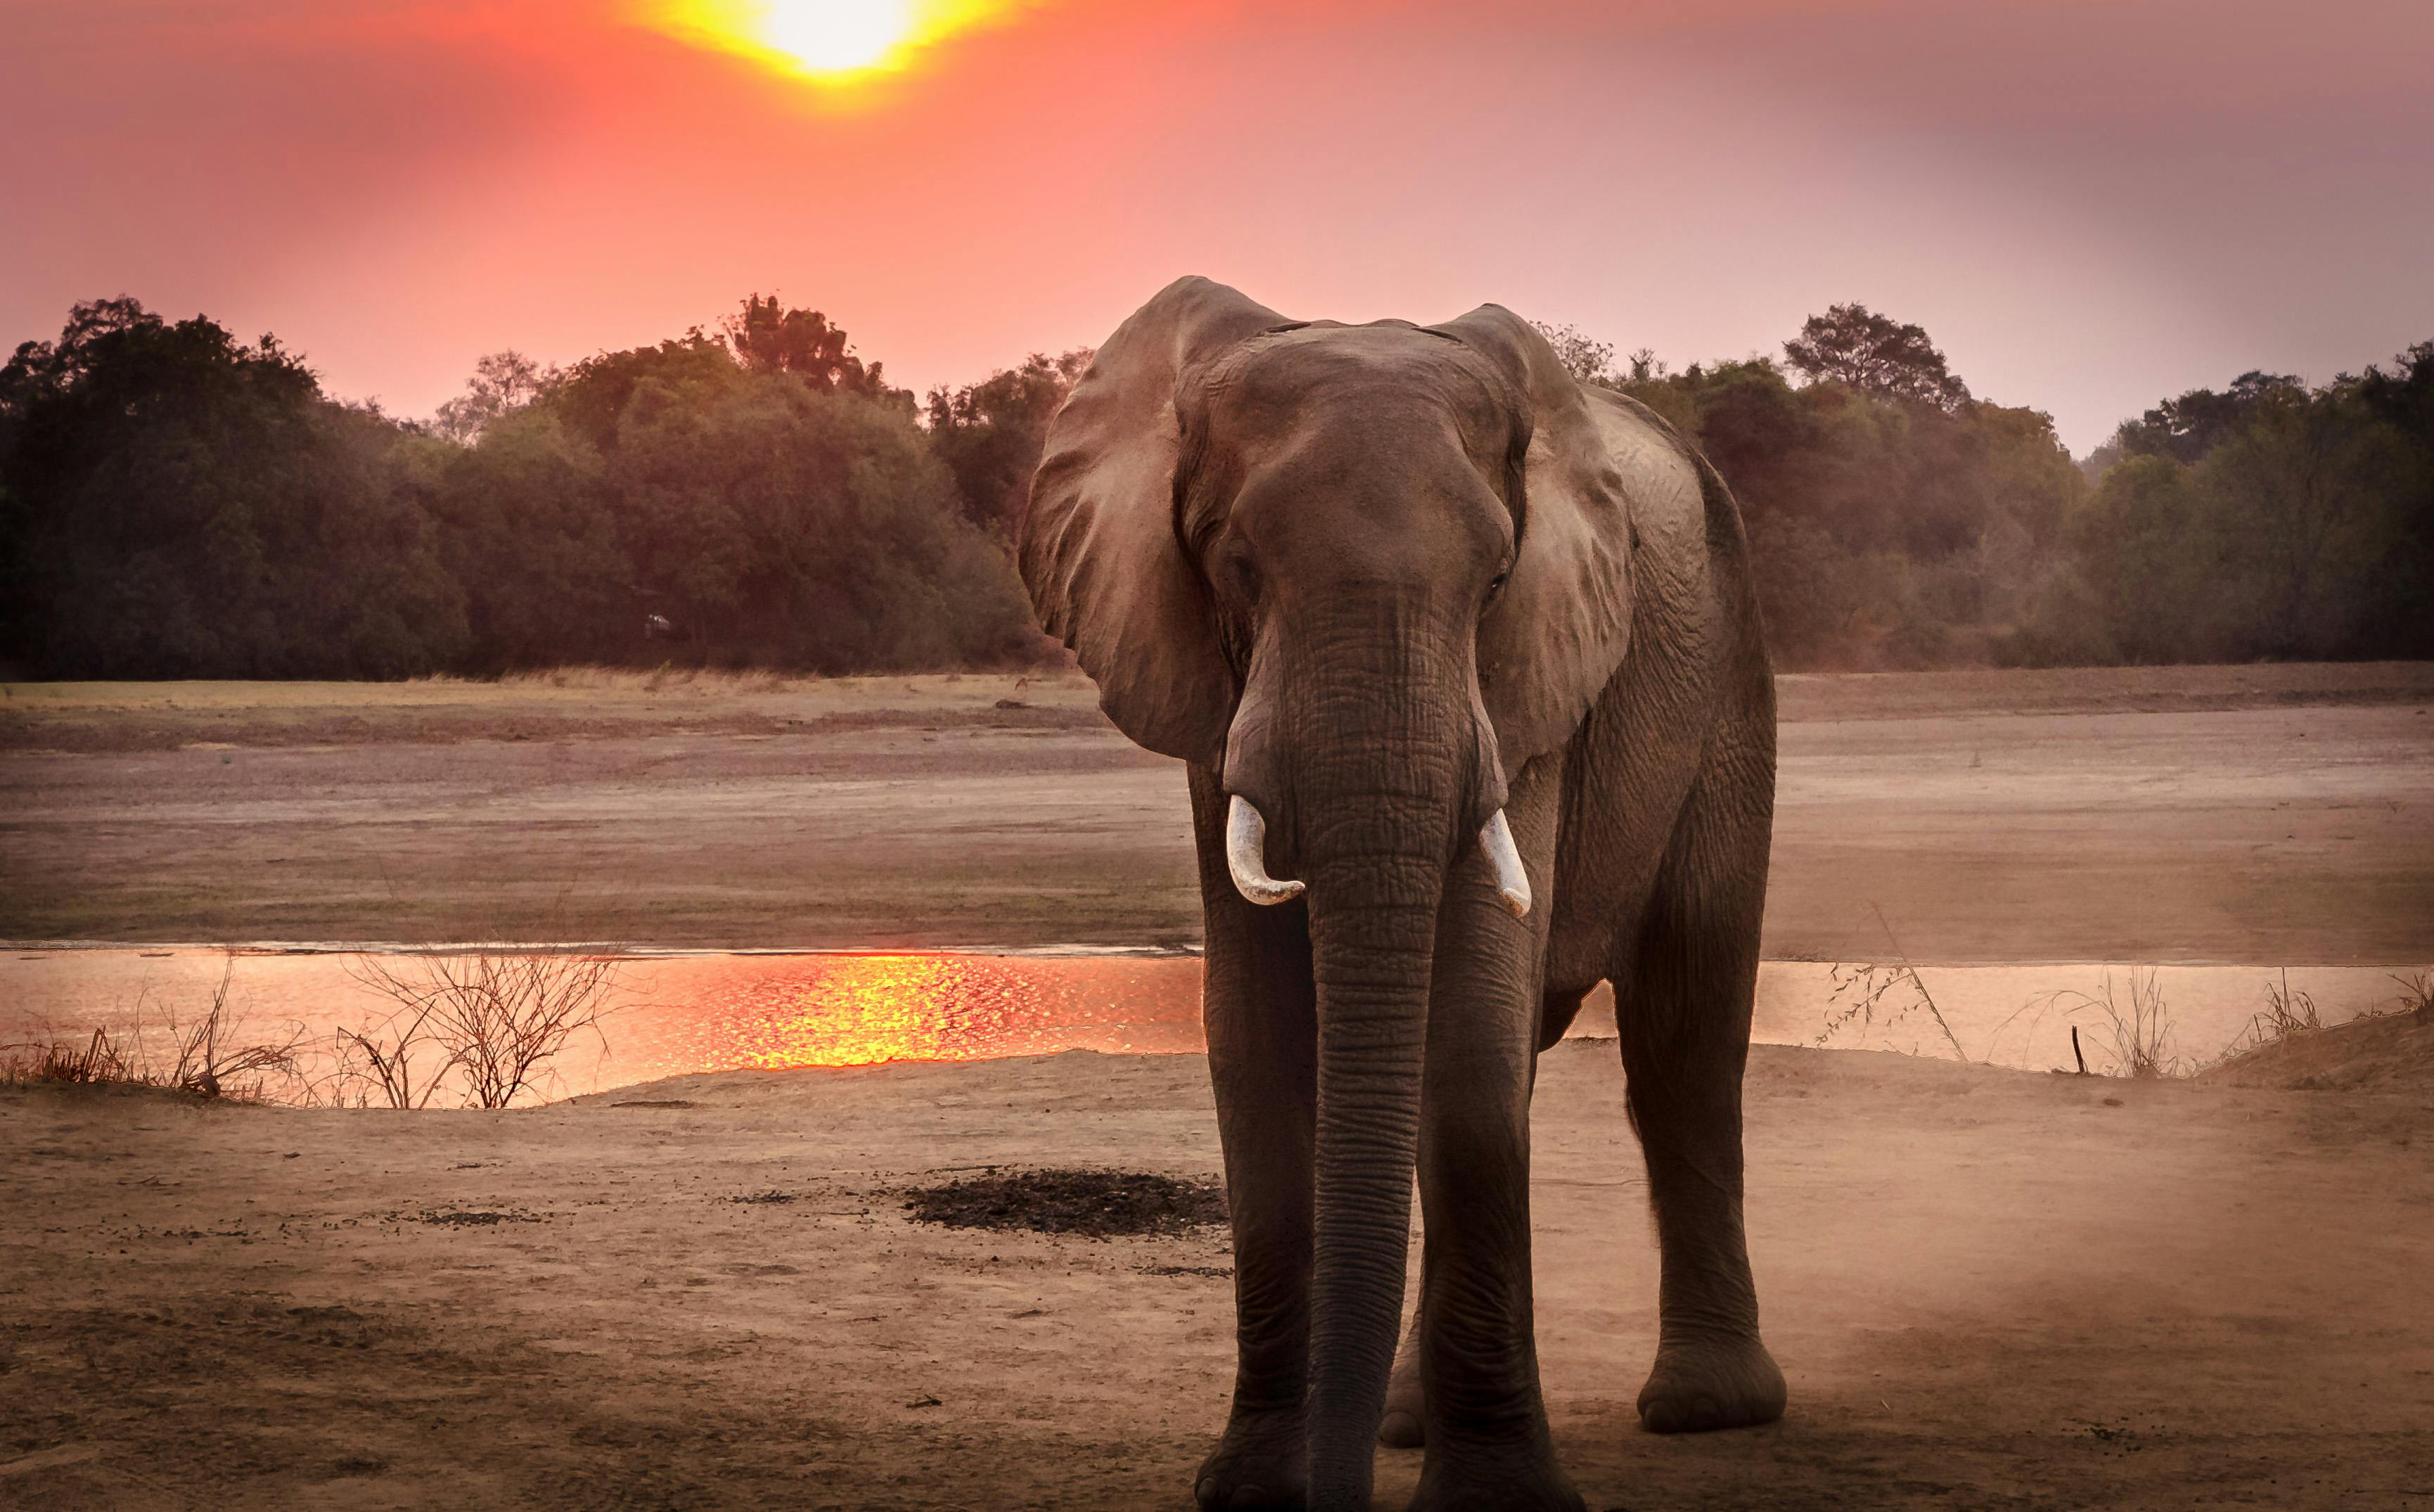

/Users/Akhila/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


**BLIP Caption:** an elephant standing in the dirt near a body of water

### VQA Answers with Confidence

**Q1: What is in the image?**

**A1: elephant** (Confidence: 0.97)


**Q2: Describe the main objects.**

**A2: elephant** (Confidence: 0.84)


**Q3: What is happening?**

**A3: bathing** (Confidence: 0.19)


**Q4: What is the color of the main object?**

**A4: gray** (Confidence: 0.99)


**Q5: How many main objects are there?**

**A5: 1** (Confidence: 0.98)


## Image 2

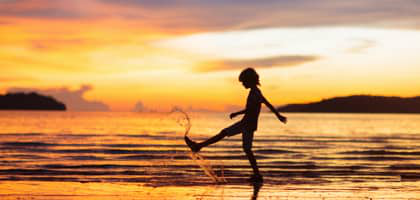

**BLIP Caption:** a silhouette of a girl running on the beach at sunset

### VQA Answers with Confidence

**Q1: What is in the image?**

**A1: woman** (Confidence: 0.29)


**Q2: Describe the main objects.**

**A2: water** (Confidence: 0.38)


**Q3: What is happening?**

**A3: frisbee** (Confidence: 0.18)


**Q4: What is the color of the main object?**

**A4: orange** (Confidence: 0.33)


**Q5: How many main objects are there?**

**A5: 1** (Confidence: 0.96)


## Image 3

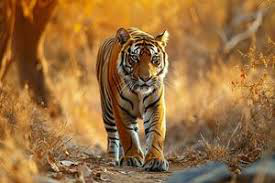

**BLIP Caption:** a tiger walking through the woods

### VQA Answers with Confidence

**Q1: What is in the image?**

**A1: zebra** (Confidence: 0.79)


**Q2: Describe the main objects.**

**A2: zebra** (Confidence: 0.36)


**Q3: What is happening?**

**A3: walking** (Confidence: 0.23)


**Q4: What is the color of the main object?**

**A4: brown** (Confidence: 0.67)


**Q5: How many main objects are there?**

**A5: 1** (Confidence: 0.92)


## Image 4

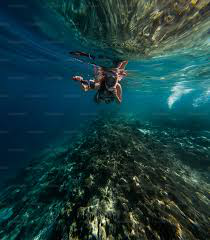

**BLIP Caption:** a man swimming in the ocean

### VQA Answers with Confidence

**Q1: What is in the image?**

**A1: water** (Confidence: 0.26)


**Q2: Describe the main objects.**

**A2: yes** (Confidence: 0.34)


**Q3: What is happening?**

**A3: surfing** (Confidence: 0.99)


**Q4: What is the color of the main object?**

**A4: green** (Confidence: 0.67)


**Q5: How many main objects are there?**

**A5: 2** (Confidence: 0.40)


## Image 5

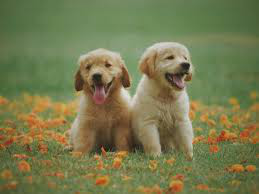

**BLIP Caption:** two golden retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve retrieve

### VQA Answers with Confidence

**Q1: What is in the image?**

**A1: dogs** (Confidence: 0.68)


**Q2: Describe the main objects.**

**A2: dogs** (Confidence: 0.55)


**Q3: What is happening?**

**A3: nothing** (Confidence: 0.23)


**Q4: What is the color of the main object?**

**A4: yellow** (Confidence: 0.61)


**Q5: How many main objects are there?**

**A5: 2** (Confidence: 0.80)


In [6]:
# ---------------------------
# Loop through Images
# ---------------------------
for i, img_path in enumerate(image_paths, 1):
    image = Image.open(img_path)
    
    display(Markdown(f"## Image {i}"))
    display(image)
    
    # BLIP caption
    caption = blip_caption(image)
    display(Markdown(f"**BLIP Caption:** {caption}"))
    
    # VQA answers with confidence
    display(Markdown("### VQA Answers with Confidence"))
    for idx, q in enumerate(questions, 1):
        answer, conf = vqa_answer_with_confidence(image, q)
        display(Markdown(f"**Q{idx}: {q}**"))
        display(Markdown(f"**A{idx}: {answer}** (Confidence: {conf:.2f})\n"))